## Определение тональности текста отзывов на фильмы IMDB с помощью рекуррентной нейронной сети

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем данные

In [6]:
max_words=10000

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Подготовка данных для обучения

In [8]:
maxlen = 200

In [9]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [10]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [11]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

c:\Users\tr07s\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [13]:
history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4945 - loss: 0.6951 - val_accuracy: 0.5556 - val_loss: 0.6878
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5877 - loss: 0.6806 - val_accuracy: 0.5696 - val_loss: 0.6810
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6268 - loss: 0.6582 - val_accuracy: 0.5572 - val_loss: 0.6801
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6599 - loss: 0.6283 - val_accuracy: 0.5532 - val_loss: 0.6848
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6954 - loss: 0.5947 - val_accuracy: 0.5552 - val_loss: 0.6998
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7284 - loss: 0.5602 - val_accuracy: 0.5556 - val_loss: 0.7130
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7467 - loss: 0.5339 - val_accuracy: 0.5452 - val_loss: 0.7414
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7666 - loss: 0.5065 - val_accu

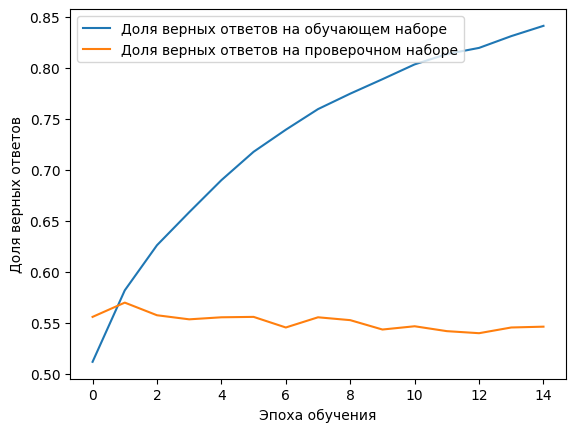

In [14]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5316 - loss: 0.9986


In [16]:
model.save('D:/BSU-Projects/6th-Term/Neural-Net/Lab_10/model.keras')

In [20]:
word_index = imdb.get_word_index()
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key
text = "I've never in my life been more entertained by a film that has absolutely NO redeeming qualities. Unintentionally inept characters engage in progressively bizarre and unnatural interactions which seem to peak at erratic and unexpected intervals. The awkwardness of the actors is framed by strange pauses, jarring scripts and incredibly bizarre production techniques - there are ample 'deer in the headlights' moments, in which you can feel genuine sympathy for these people who are obviously so caught up in Tommy's strange and dominating creative control that they've failed to see any better."

def process_comment(text: str):
    text = text.lower().split()
    text_to_train = []
    for word in text:
        if word in word_index:
            if word_index[word] < 10000:
                text_to_train.append(word_index[word])
        else:
            text_to_train.append(0)
        # text_to_train.append(word_index[word] + 3) if word in word_index else 0
    text_to_train = np.array(text_to_train).reshape(1, -1)
    return pad_sequences(text_to_train, maxlen=200)
    
text_to_train = process_comment(text)
model.predict(text_to_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.25685862]], dtype=float32)